#### **Project Introduction: Customer Support Data Analysis**
- The primary objective of this project is to perform a comprehensive analysis of customer support operations using historical service data. Specifically, we aim to identify key patterns and understand the factors that influence customer satisfaction scores (CSAT).

- Our analysis focuses on uncovering how different variables — such as resolution time, response behavior, service category, communication channel, and managerial oversight — contribute to variations in client scoring. By evaluating these relationships, we seek to highlight the drivers of both high and low customer satisfaction.

- Additionally, the project aims to assess the operational performance of support agents, measure the efficiency of various channels, and detect any inconsistencies or performance trends across key categorical dimensions. These dimensions include agent shift, tenure, manager, and issue category.

- Through this analysis, we intend to provide actionable insights that can support data-driven improvements in customer support processes, enhance service quality, and ultimately, increase overall client satisfaction.

### **loading the libraries**

In [51]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import datetime as dt


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

#### **Data cleaning**

In [52]:
df = pd.read_csv('Customer_support_data.csv')
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01-08-2023 11:13,01-08-2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01-08-2023 12:52,01-08-2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01-08-2023 20:16,01-08-2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01-08-2023 20:56,01-08-2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01-08-2023 10:30,01-08-2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


Text(0.5, 1.0, 'messing value pourcentage')

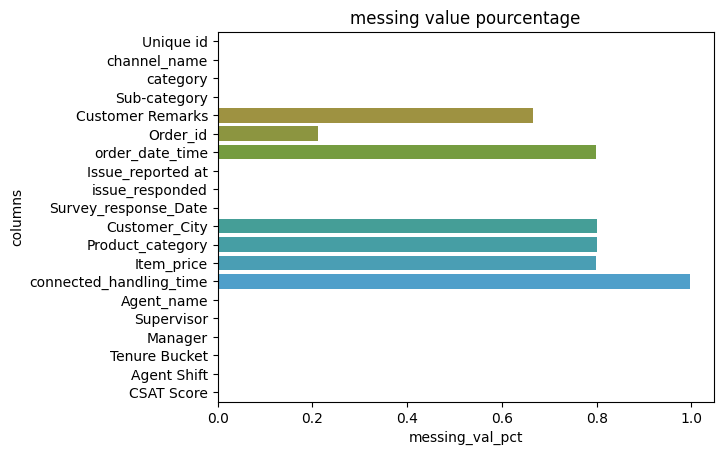

In [53]:
nan_value = [ val / df.shape[0] for val in df.isna().sum()]
messing_values = pd.DataFrame(nan_value,df.columns).reset_index()
messing_values.columns = ['columns','messing_val_pct']
messing_values
sns.barplot(messing_values,y='columns',x='messing_val_pct',hue='columns')
plt.title('messing value pourcentage')

* this plot represents the pourcentage of messing values in our dataset , we can observe that for 6 columns the messing value pourcentage is superior than 0.5 so the best strategy to clean the data is to drop this columns 

In [54]:
col_drop = messing_values.loc[messing_values['messing_val_pct'] > 0,'columns'].tolist()
col_drop

['Customer Remarks',
 'Order_id',
 'order_date_time',
 'Customer_City',
 'Product_category',
 'Item_price',
 'connected_handling_time']

In [55]:
df.drop(col_drop,axis=1,inplace=True)

In [56]:
df.head()

,Unique id,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,01-08-2023 11:13,01-08-2023 11:47,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,01-08-2023 12:52,01-08-2023 12:54,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,01-08-2023 20:16,01-08-2023 20:38,01-Aug-23,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,01-08-2023 20:56,01-08-2023 21:16,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,01-08-2023 10:30,01-08-2023 10:32,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [57]:
df.drop(df.columns[0],axis=1,inplace=True)

In [58]:
df.head()

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,Outcall,Product Queries,Life Insurance,01-08-2023 11:13,01-08-2023 11:47,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,Outcall,Product Queries,Product Specific Information,01-08-2023 12:52,01-08-2023 12:54,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,Inbound,Order Related,Installation/demo,01-08-2023 20:16,01-08-2023 20:38,01-Aug-23,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,Inbound,Returns,Reverse Pickup Enquiry,01-08-2023 20:56,01-08-2023 21:16,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,Inbound,Cancellation,Not Needed,01-08-2023 10:30,01-08-2023 10:32,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [59]:
df.dtypes

channel_name            object
category                object
Sub-category            object
Issue_reported at       object
issue_responded         object
Survey_response_Date    object
Agent_name              object
Supervisor              object
Manager                 object
Tenure Bucket           object
Agent Shift             object
CSAT Score               int64
dtype: object

In [60]:
for col in df.columns[3:5]:
    df[col] = pd.to_datetime(df[col],format='%d-%m-%Y %H:%M')

In [61]:
df.head()

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,Outcall,Product Queries,Life Insurance,2023-08-01 11:13:00,2023-08-01 11:47:00,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,Outcall,Product Queries,Product Specific Information,2023-08-01 12:52:00,2023-08-01 12:54:00,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,Inbound,Order Related,Installation/demo,2023-08-01 20:16:00,2023-08-01 20:38:00,01-Aug-23,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,Inbound,Returns,Reverse Pickup Enquiry,2023-08-01 20:56:00,2023-08-01 21:16:00,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,Inbound,Cancellation,Not Needed,2023-08-01 10:30:00,2023-08-01 10:32:00,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [62]:
df['resolution_time'] = (df[df.columns[4]] - df[df.columns[3]]).dt.total_seconds() / 60
df.head()

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,resolution_time
0,Outcall,Product Queries,Life Insurance,2023-08-01 11:13:00,2023-08-01 11:47:00,01-Aug-23,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,34.0
1,Outcall,Product Queries,Product Specific Information,2023-08-01 12:52:00,2023-08-01 12:54:00,01-Aug-23,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,2.0
2,Inbound,Order Related,Installation/demo,2023-08-01 20:16:00,2023-08-01 20:38:00,01-Aug-23,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,22.0
3,Inbound,Returns,Reverse Pickup Enquiry,2023-08-01 20:56:00,2023-08-01 21:16:00,01-Aug-23,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,20.0
4,Inbound,Cancellation,Not Needed,2023-08-01 10:30:00,2023-08-01 10:32:00,01-Aug-23,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,2.0


### **Exploring our data**

##### **exploring the categorical columns**

In [63]:
categ_col = [ col for col in df.columns if len(df[col].unique()) < 20]
for col in categ_col :
    print('--'*45)
    print(f'column : {col}')
    print(f' number of unique values  :{len(df[col].unique())}')
    print(f'unique values :{df[col].unique()}')

------------------------------------------------------------------------------------------
column : channel_name
 number of unique values  :3
unique values :['Outcall' 'Inbound' 'Email']
------------------------------------------------------------------------------------------
column : category
 number of unique values  :12
unique values :['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related' 'Others' 'App/website']
------------------------------------------------------------------------------------------
column : Manager
 number of unique values  :6
unique values :['Jennifer Nguyen' 'Michael Lee' 'William Kim' 'John Smith' 'Olivia Tan'
 'Emily Chen']
------------------------------------------------------------------------------------------
column : Tenure Bucket
 number of unique values  :5
unique values :['On Job Training' '>90' '0-30' '31-60' '61-90']
------------------

In [64]:
categ_col

['channel_name',
 'category',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score']

In [65]:
data  = df['CSAT Score'].value_counts().reset_index()
data.sort_values(by='count',ascending=False,inplace=True)
data

,CSAT Score,count
0,5,59617
1,1,11230
2,4,11219
3,3,2558
4,2,1283


#### **exploring the data** 

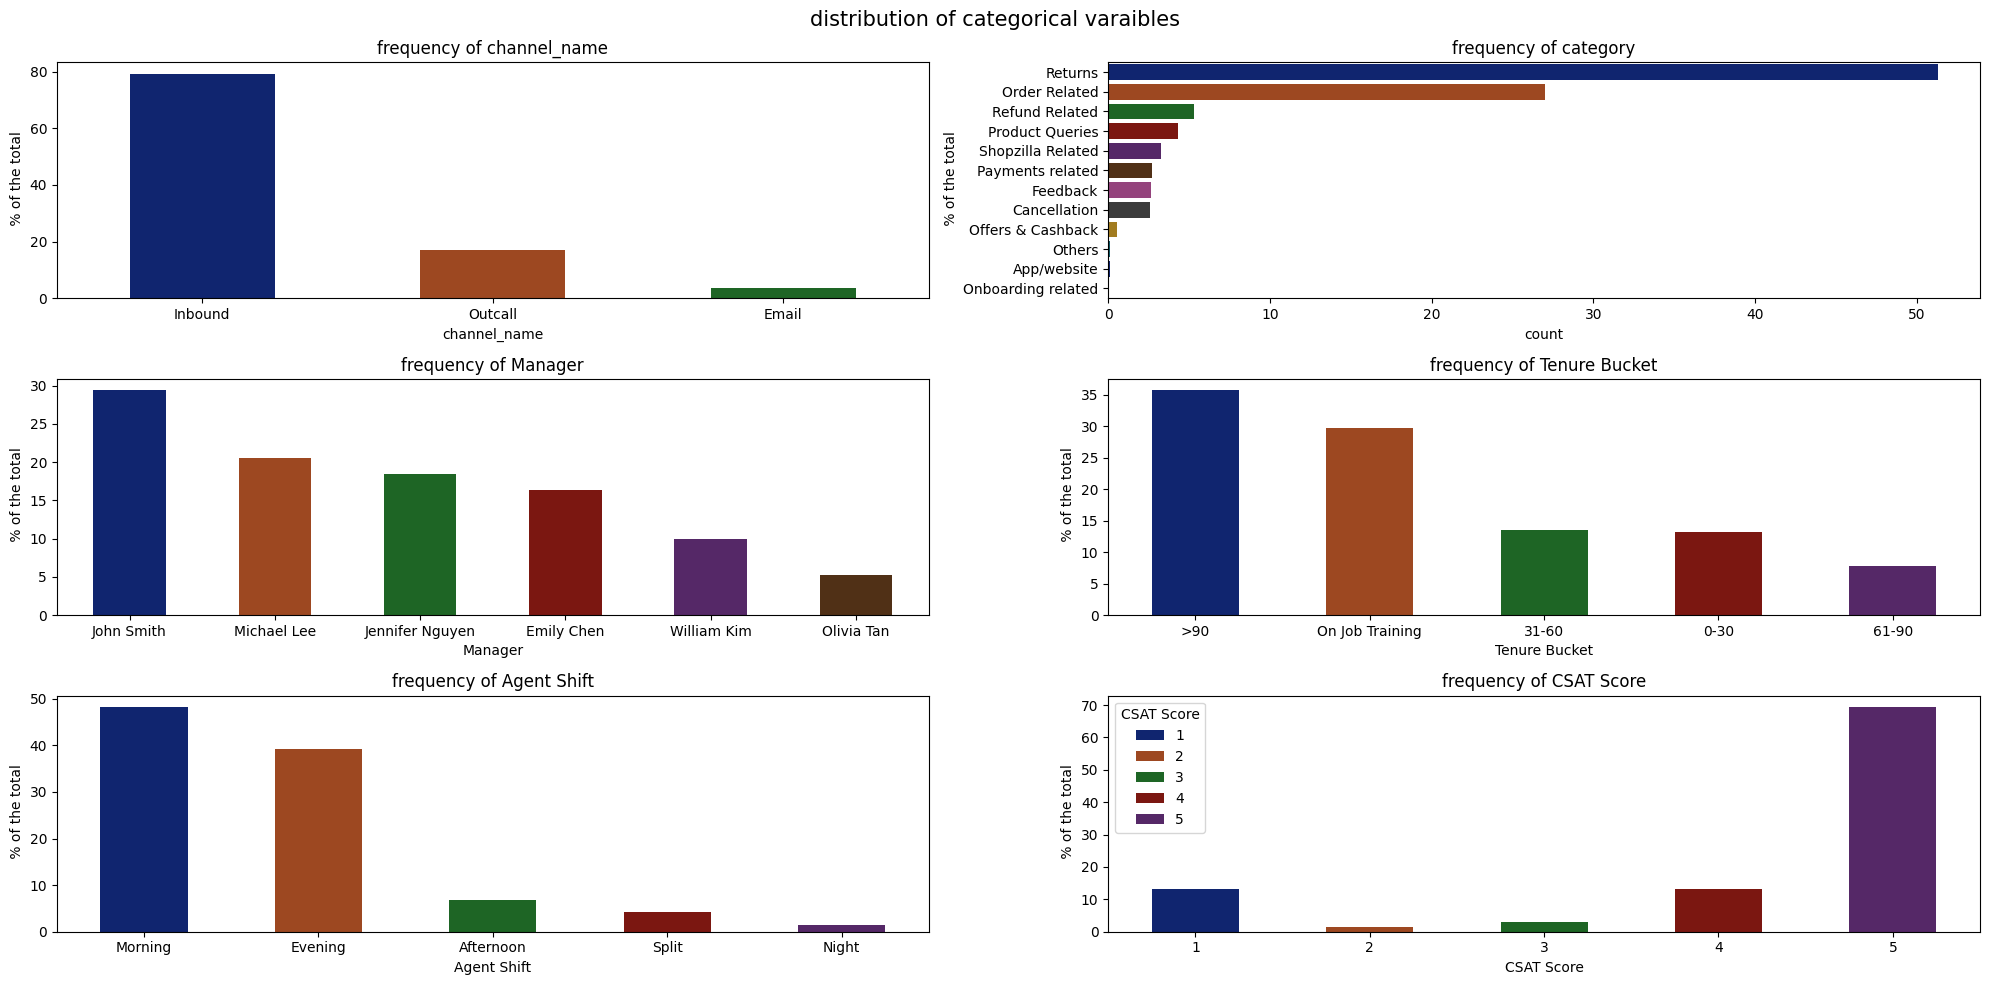

In [66]:
fig , ax = plt.subplots(3,2,figsize=(20,10))
plt.suptitle('distribution of categorical varaibles',size=15)
ax = ax.flatten()

for i,col in enumerate (categ_col) :
    data  = df[col].value_counts().reset_index()
    data['count'] = data['count']/data['count'].sum() * 100 
    data.sort_values(by='count',ascending=False,inplace=True)
    if len(data[col].unique()) > 8:
        sns.barplot( data,x='count',y=col,hue=col,palette='dark',ax=ax[i],dodge=False,ci=95)
    else : 
        sns.barplot( data,y='count',x=col,hue=col,palette='dark',ax=ax[i],dodge=False,width=0.5)
    ax[i].set_ylabel(' % of the total')    
    ax[i].set_title(f'frequency of {col}')
plt.tight_layout()    


##### **Distribution and Frequency Analysis of Categorical Variables**

Observations:
``Channel Usage``

- The most used communication channel is Inbound, accounting for over 75% of total interactions.

- Outcall comes second with under 20%, while Email is the least used channel.

``Customer Query Categories``

- Returns dominate, representing about 50% of all customer queries.

- Order-related issues follow with approximately 30%.

- Other categories such as Refunds, Product Queries, and Payments have much smaller shares.

- Website issues and Onboarding are the least raised concerns.

``Customer Service Experience Structure``


- Around 35% of agents have more than 90 months of experience.

- Trainees (on-job training) account for roughly 30%.

- Those with intermediate experience (30–90 months) make up the remaining 35%.

- This indicates a well-balanced team across senior, beginner, and intermediate levels.

- ``Working Shifts``

- Most agents work in the Morning and Evening shifts, with Morning leading at nearly 45%.

- Afternoon, Split, and Night shifts are much less common.

- Customer Satisfaction (CSAT) Score

- The CSAT score is heavily skewed toward score 5, representing about 70% of responses.

- Lower scores (1 to 4) are much less frequent, suggesting high customer satisfaction and effective performance by the CS team.

#### **studying the rating score by managers agent shift and tenure bucket**

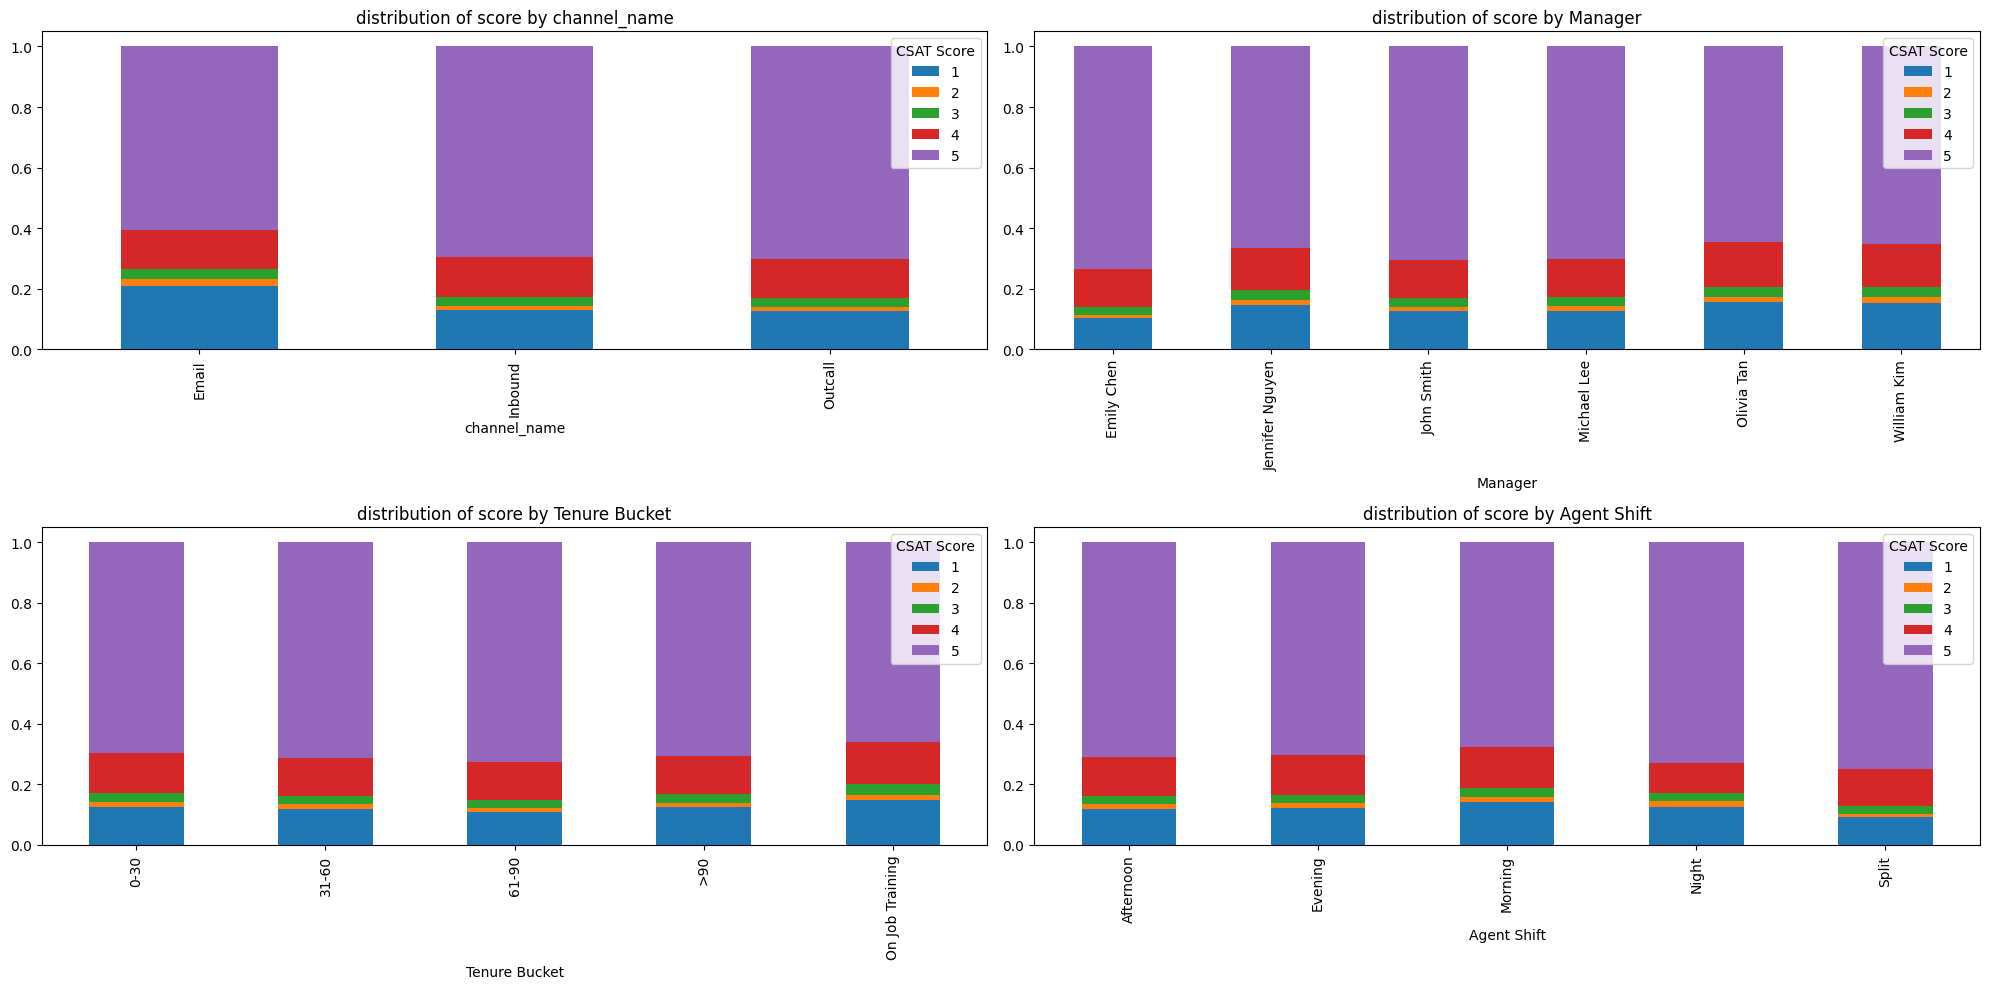

In [ ]:
fig , ax = plt.subplots(2,2, figsize=(20,10))
ax = ax.flatten()

for i ,col in enumerate(['channel_name',
'Manager',
'Tenure Bucket',
'Agent Shift']):
    data = pd.crosstab(df[col],df['CSAT Score'],normalize='index')
    data.plot(kind='bar',stacked=True,ax=ax[i])
    ax[i].set_title(f'distribution of score by {col}')
plt.tight_layout() 

* from the subplot we can see that the scoring of the services is evenly distributed over all the channels , managers , tenure bucket , Agent Shift with small variation in score 1 across all the plots while the score number 5 is keep dominating , this implies a good performance in CS services across all the channels , managers and cs operators 

#### **evaluating the performance of cs by the categories**

Text(0.5, 1.0, 'CSAT by category')

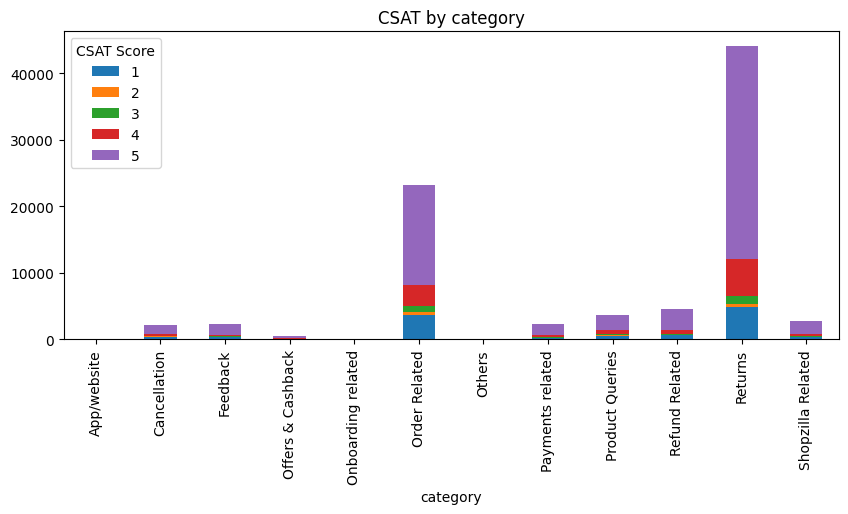

In [68]:
pd.crosstab(df['category'],df['CSAT Score']).plot(kind='bar',stacked=True,figsize=(10,4))
plt.title('CSAT by category')

* sames goes for the categorie the full score keep dominatig the scence across all the categories , meaning that most Clients find our Cs services helpful also our cs providing good quick services 

##### **Bivariate analysis of csat score and resolution time**

<Axes: xlabel='resolution_time', ylabel='Count'>

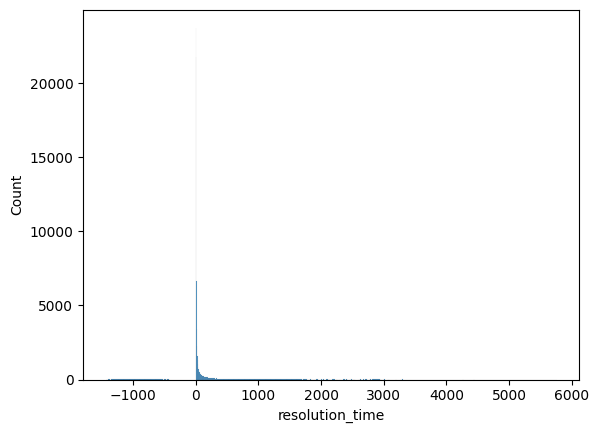

In [69]:
sns.histplot(df['resolution_time'],binwidth=5,bins=20)

the hisplot shows some anomaly in our resolution column , fist the duration can not be negitaves this implies that the respond was made before the alert which does not make any sense , it probably due to the absent of the hour and min data in the respond and alerted columns  , so we need to investigate and fix this data issues .

In [70]:
df = df[ ~ (df['resolution_time'] < 0)]

In [71]:
percentiles = [10, 25, 50, 75, 90, 95, 99]
values = np.percentile(df['resolution_time'], percentiles)

In [72]:
for i , pct in enumerate(values[3:]):
    print(i)

0
1
2
3


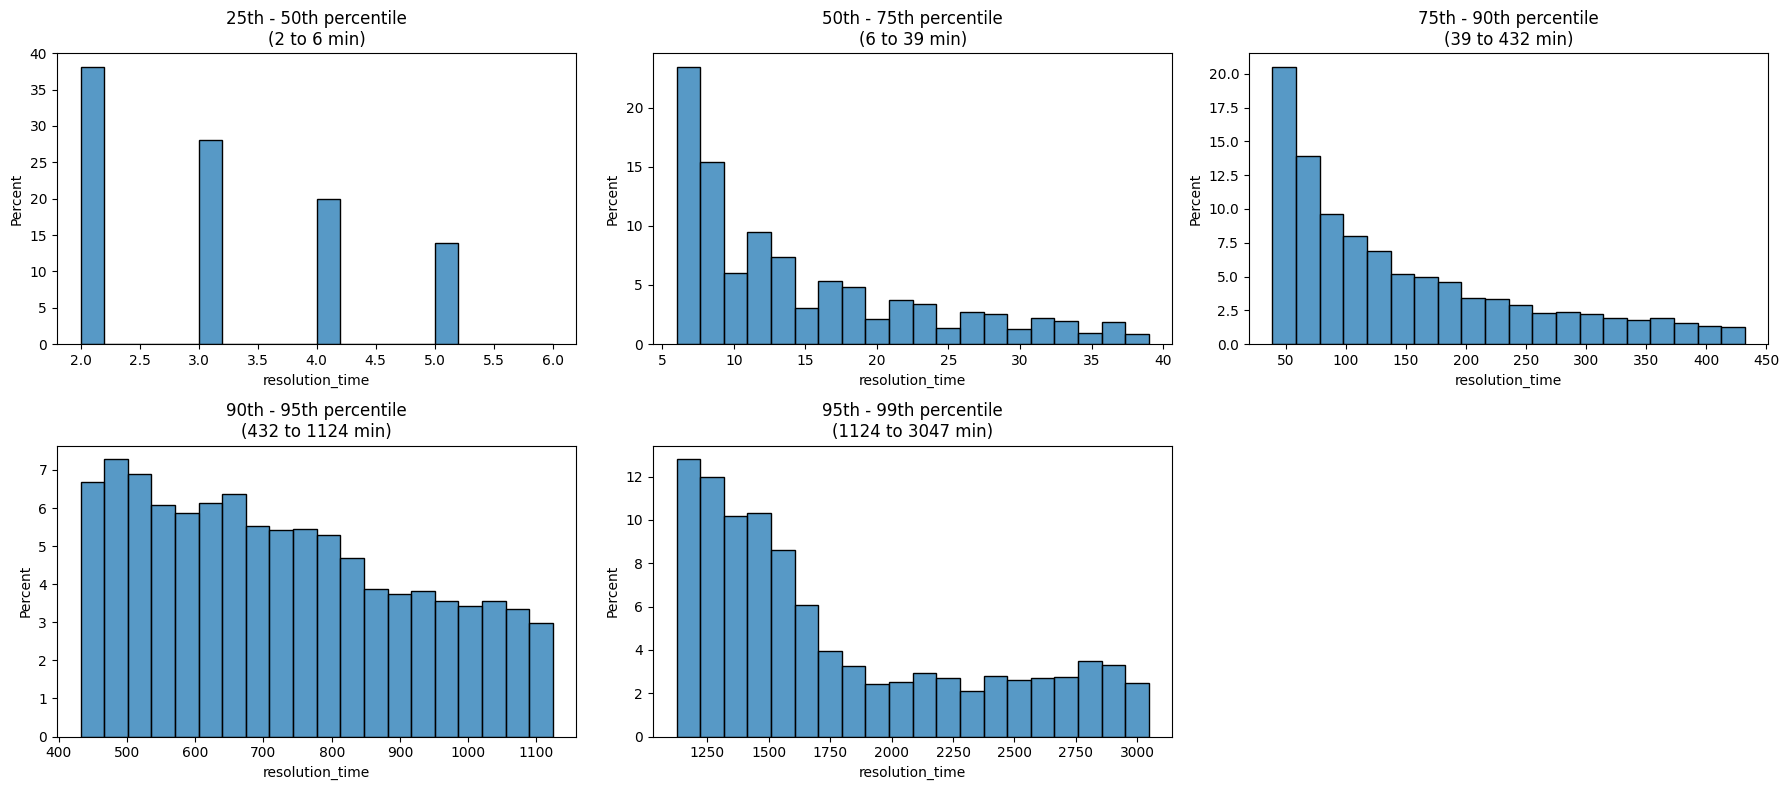

In [73]:
percentiles = [25, 50, 75, 90, 95, 99]
values = np.percentile(df['resolution_time'], percentiles)

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(18, 8))
ax = ax.flatten()

# We'll use 6 subplots for 6 percentile intervals
for i in range(len(values) - 1):
    lower = values[i]
    upper = values[i + 1]
    sns.histplot(df[(df['resolution_time'] >= lower) & (df['resolution_time'] < upper)]['resolution_time'],
                bins=20,
                binrange=(lower, upper),
                ax=ax[i],
                stat='percent')
    ax[i].set_title(f'{percentiles[i]}th - {percentiles[i+1]}th percentile\n({int(lower)} to {int(upper)} min)')

fig.delaxes(ax[len(values) - 1])
plt.tight_layout()
plt.show()

**Distribution of resolution time**
- the distribution of resolution time is right skewed it ranges from 0 to 3000 min 
- 50 % of the alerts are responded in between 0 to 6 min , 40 % are responded in less than 2 min 
- 50% to 75% of alerts are responded between 6 to 39 min 

##### **Resolution time by categorical variables**

<Axes: xlabel='channel_name', ylabel='resolution_time'>

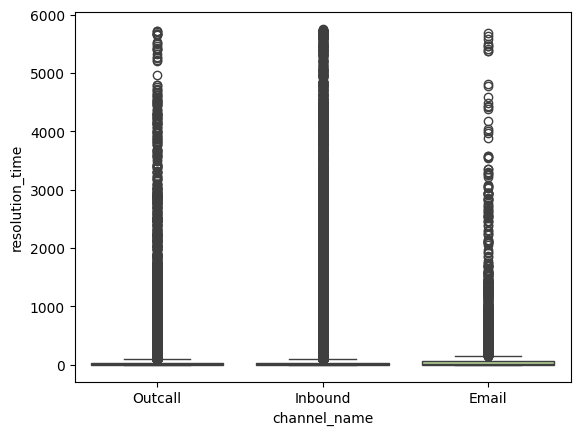

In [74]:
sns.boxplot(df,x='channel_name',y='resolution_time',hue='channel_name',palette='Paired')

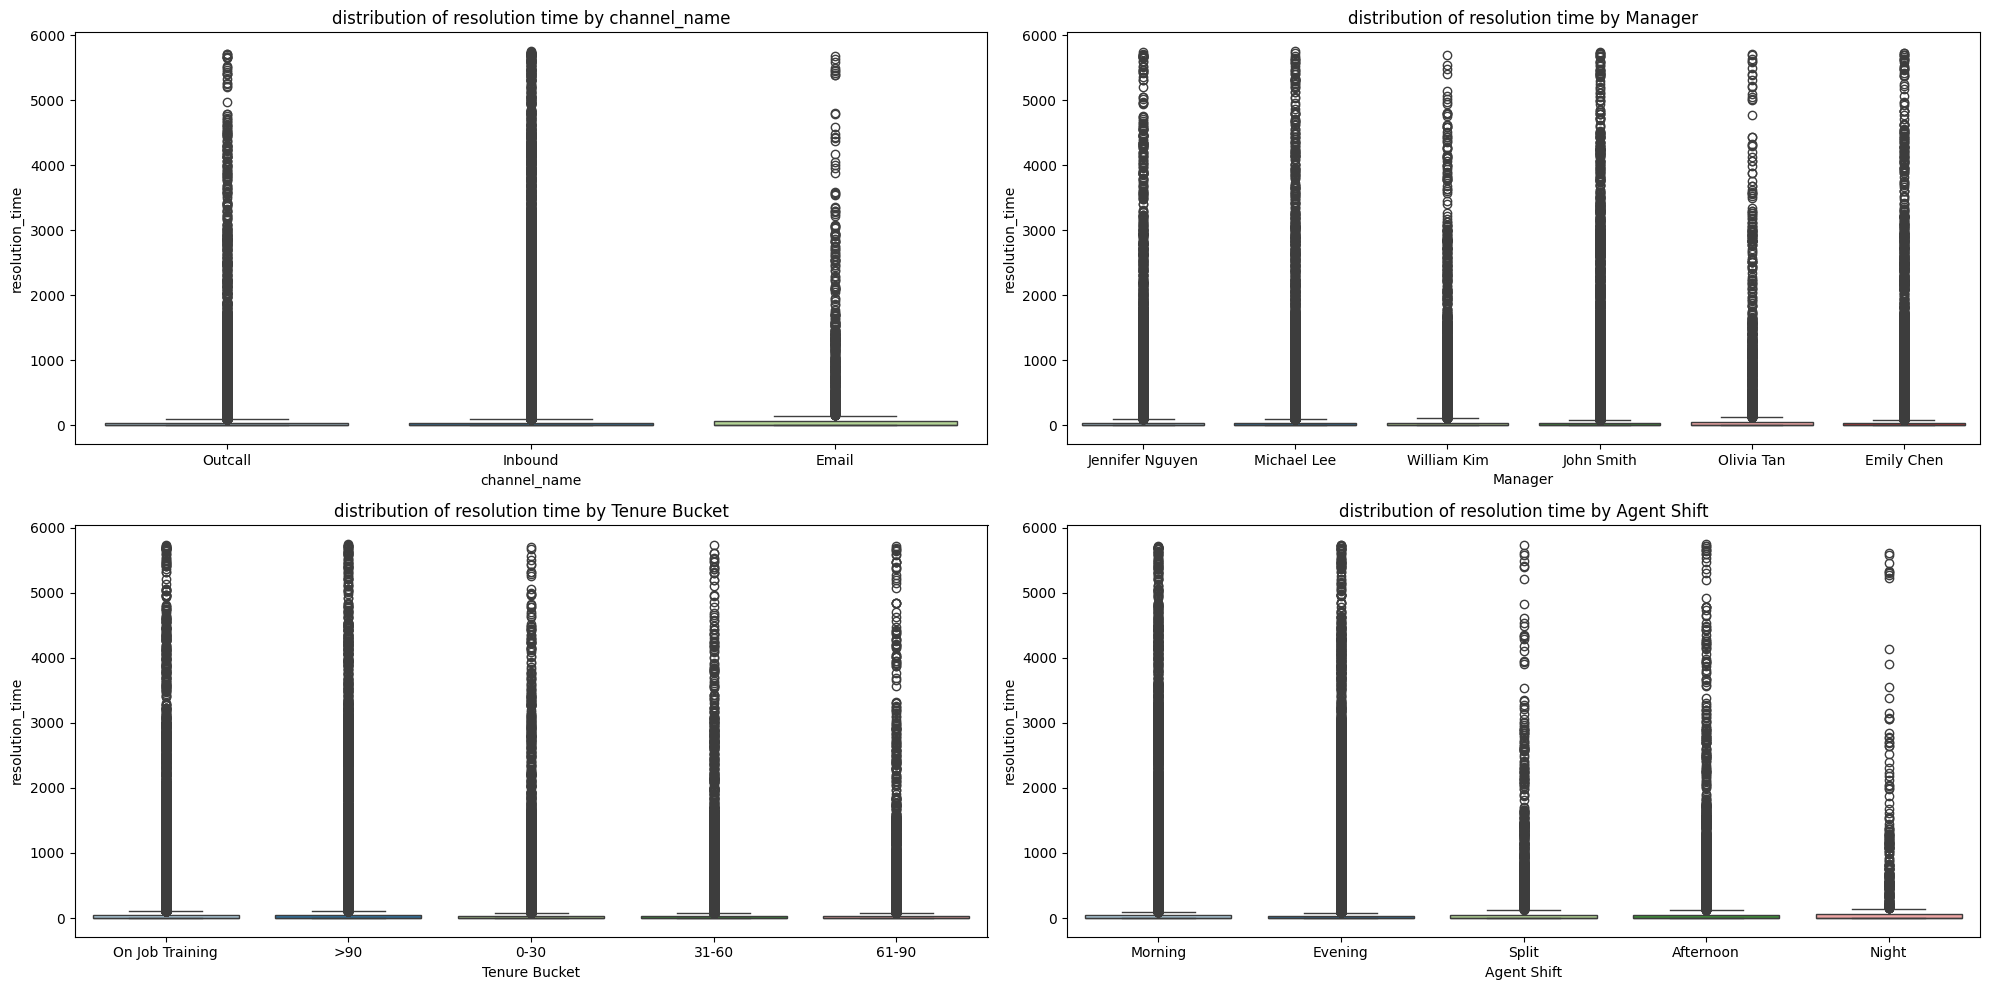

In [84]:
fig , ax = plt.subplots(2,2, figsize=(20,10))
ax = ax.flatten()

for i ,col in enumerate(['channel_name','Manager','Tenure Bucket','Agent Shift']):
    sns.boxplot(df,x=col,y='resolution_time',hue=col,palette='Paired',ax=ax[i])
    ax[i].set_title(f'distribution of resolution time by {col}')
plt.tight_layout()    



#### **resolution time by  categorical variables with outliers**

**observation :**
- we can see that the mean and the std are inflated  due , could be misleading for central tendancy and variation , to outiers that represents 10 % of our data .
- we need to limit the effect of extreme values .
- we will apply a method called winsorazation it's used to limit the influence of extreme values by replacing them with the upper and lower bounds 

#### **after handling Outliers**

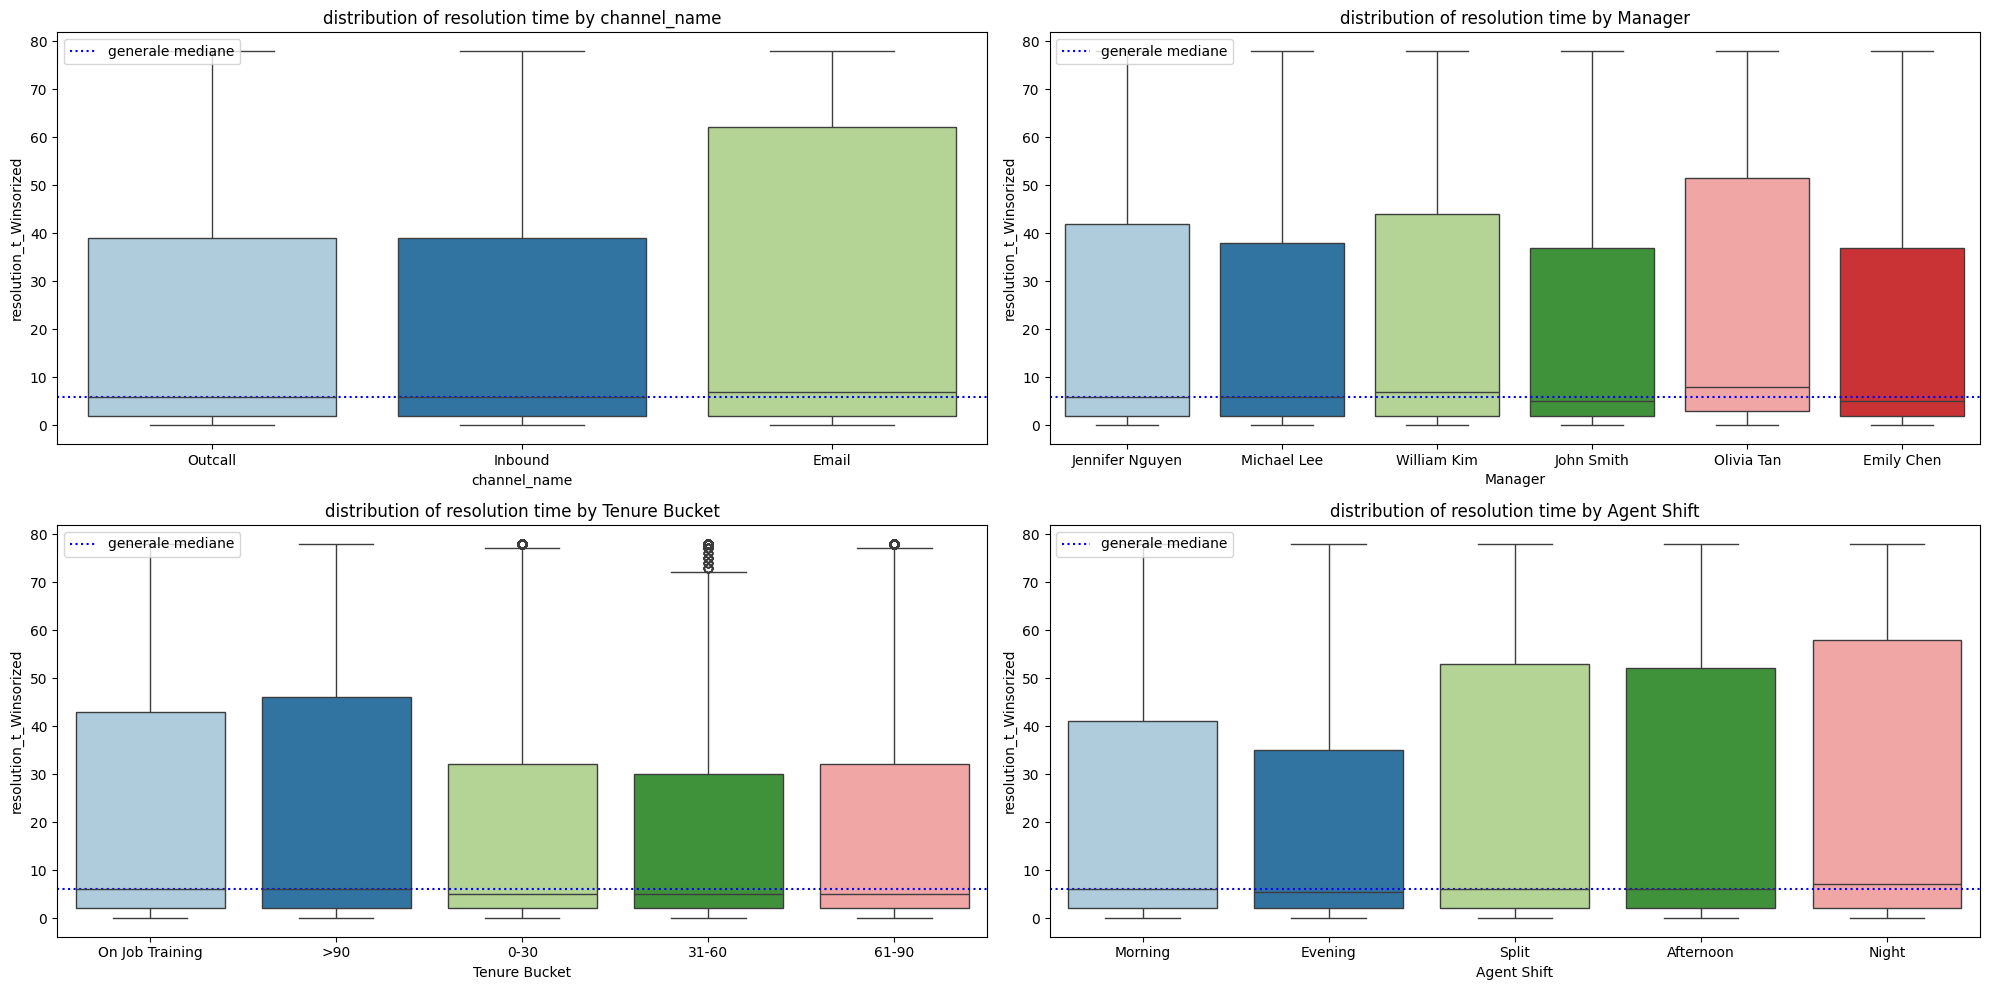

In [97]:
fig , ax = plt.subplots(2,2, figsize=(20,10))
ax = ax.flatten()

for i ,col in enumerate(['channel_name','Manager','Tenure Bucket','Agent Shift']):
    sns.boxplot(df,x=col,y='resolution_t_Winsorized',hue=col,palette='Paired',ax=ax[i])
    ax[i].axhline(df['resolution_t_Winsorized'].median(),linestyle=':',color='blue',label='generale mediane')
    ax[i].legend(loc='upper left')
    ax[i].set_title(f'distribution of resolution time by {col}')
plt.tight_layout()    


**objective** :
- Understand how resolution times vary across key catigorical drivers - channels , managers , agent Tenure , and shift.
---
- ``Channel Name``
- email has the widest spread in resolution times and also highest median meaning emails generally take longer to resolve.
- outcall and inbounds have a lower median and shorter intequantile ranges suggesting faster and more consistent resolution times .
---
- ``Managers``
- all managers have simular upper ranges :
* but Olivia tan shows higher median than the generale median and widest spread in the third quantile means longer and varied resolution time 
* Emily Chen and Michael Lee show the lowest medians, indicating better performance in resolution time.
---
- ``Tenure Bucket``
- agents with more than 90 month have a higher mediane indicating that experienced CS handle more complex cases 
- 31 - 60 and 61-90 agents  shows the lowest median and less variation indicating hight performance and consitent resolution time , same goes for the junior(0-30)
- finally we have agents on training , showing a low median but with hight variation for the third quantile 
---
- ``agent shift``
- Night and Split shifts have higher medians and wider IQRs, indicating slower and less consistent resolution.

- Evening and Morning shifts perform better, with lower medians and tighter distributions.

##### **analysing how the resolution times affects the CSAT score**

In [99]:
df.columns

Index(['channel_name', 'category', 'Sub-category', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Agent_name', 'Supervisor',
       'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score',
       'resolution_time', 'resolution_t_Winsorized'],
      dtype='object')

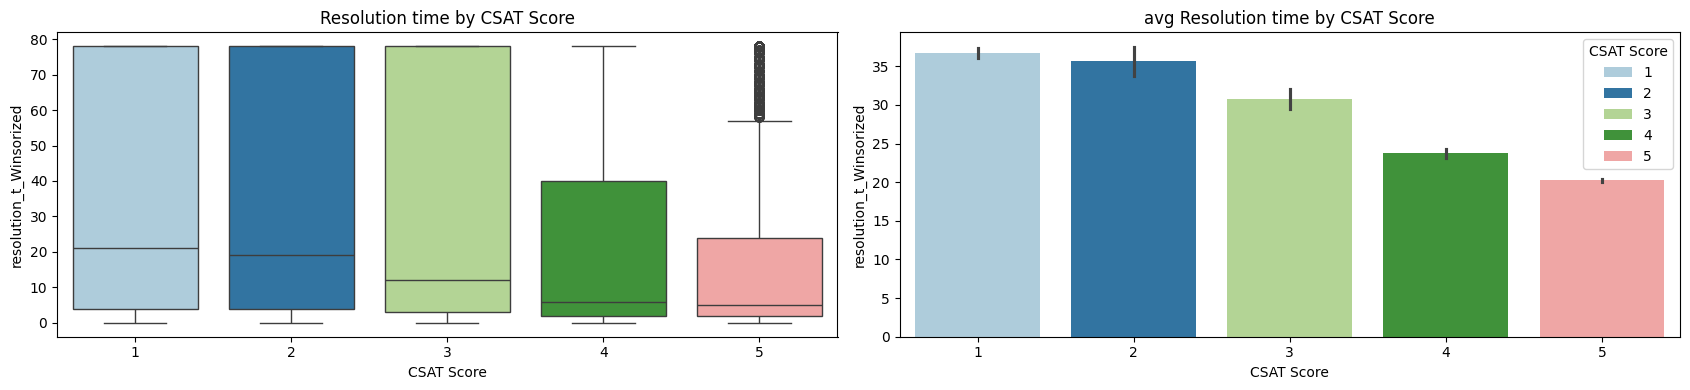

In [148]:
plt.figure(figsize=(17,4))
plt.subplot(1,2,1)
sns.boxplot(df,x='CSAT Score',y='resolution_t_Winsorized',hue='CSAT Score',palette='Paired',legend=False)
plt.title('Resolution time by CSAT Score')
plt.subplot(1,2,2)
sns.barplot(df,x='CSAT Score',y='resolution_t_Winsorized',hue='CSAT Score',palette='Paired',estimator='mean',ci=95)
plt.title('avg Resolution time by CSAT Score')
plt.tight_layout()

in this part we want to understand the relation between the resolution time and the CSAT score :
- from the boxplot we can see that the low score (1,2,3) have a hight median and a very wide spread this suggest a hight variability in resolution time meaning poor to low quality and client satisfaction in contrast the highest score (5,4) shows low median and tigher spread of values also lower max value especialy in score 5 , this means a low resolution time that implies Efficient and more consistent
- same for the plot that shows the average resolution time per each score , we can see Median drops steadily from score 1 → 5 by approximately 16 min between the lowest and highest scores , this aligns perfectly with what we saw earlier in the boxplot. 


In [120]:
from scipy.stats import spearmanr
corr, pval = spearmanr(df['resolution_time'], df['CSAT Score'])
print(f"Spearman Correlation: {corr:.3f}, p-value: {pval:.4f}")

Spearman Correlation: -0.185, p-value: 0.0000


Both the correlation analysis (ρ = –0.18, p < 0.001) and the distributional patterns in the CSAT vs. resolution time boxplot suggest that longer and more inconsistent resolution times are associated with lower CSAT scores. Higher customer satisfaction (scores 4 and 5) aligns with lower median resolution times and reduced variability, indicating that speed and consistency of support are key drivers of positive customer experience.

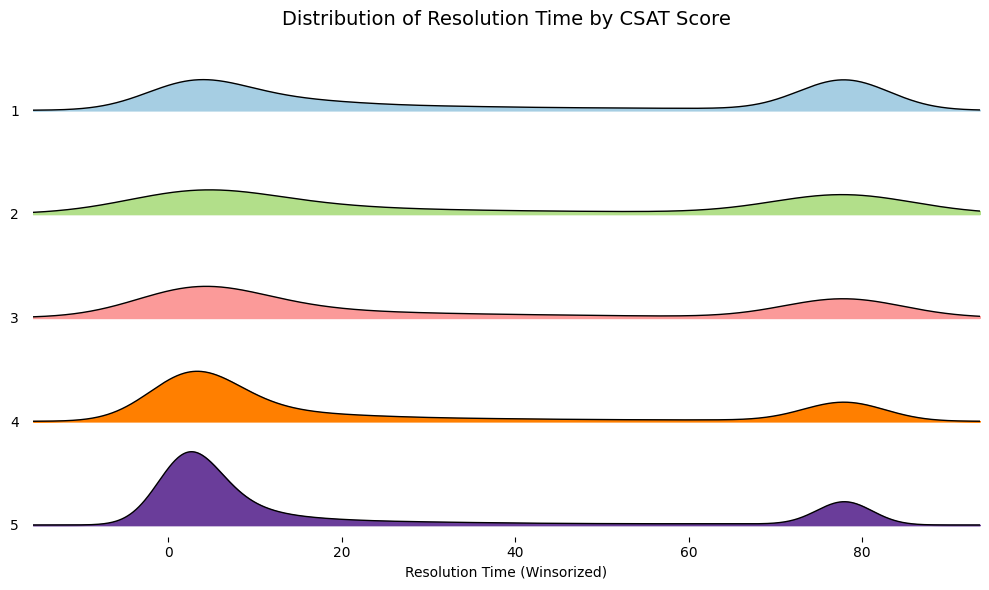

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from joypy import joyplot




# Ridgeline plot
fig, ax = plt.subplots(figsize=(10, 6))
joyplot(
    data=df,
    by='CSAT Score',
    column='resolution_t_Winsorized',
    kind='kde',
    overlap=0.5,
    colormap=plt.cm.Paired,
    linewidth=1,
    ax=ax
)
plt.title("Distribution of Resolution Time by CSAT Score", fontsize=14)
plt.xlabel("Resolution Time (Winsorized)")
plt.ylabel("CSAT Score")
plt.tight_layout()
plt.show()
